# Compare $E$ slices

Create figures 9 and 10 for the paper. 

In [1]:
%matplotlib notebook

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pandas as pd
from scipy.optimize import curve_fit

C:\Users\pfsch\Anaconda3\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
os.chdir('..')
os.getcwd()

'C:\\Users\\pfsch\\Box Sync\\Projects\\fnpc\\analysis'

In [4]:
sys.path.append('../scripts/')
import bicorr_sim as bicorr_sim
import bicorr_plot as bicorr_plot
import bicorr_math as bicorr_math

In [5]:
%load_ext autoreload
%autoreload 2

What are the variables I need to plot?

* Eave
* Eave_err
* e_slices

In [6]:
os.listdir('cgmf/datap')

['Asym_df.csv',
 'bhm_e.npz',
 'by_angle_e_df.csv',
 'det_df_e_filled.csv',
 'Esum_df.csv',
 'num_fissions.mat',
 'singles_e_df_filled.csv',
 'singles_hist.npz',
 'singles_hist_e_n.npz',
 'slices_analysis.npz',
 'sparse_bhm.npz']

In [7]:
meas_data = np.load('Cf072115_to_Cf072215b//datap/slices_analysis.npz')
cgmf_data = np.load('cgmf/datap/slices_analysis.npz')
freya_data= np.load('freya/datap/slices_analysis.npz')
ipol_data = np.load('ipol/datap/slices_analysis.npz')
ipol_noct_data = np.load('ipol_noct/datap/slices_analysis.npz')

datasets = [meas_data, cgmf_data,   freya_data,   ipol_data,   ipol_noct_data]
legends =['Experiment', 'CGMF',      'FREYA',      'PoliMi',    'PoliMi-No CT']
fmts   = ['x',          's',         'D',          'o',         '^']
colors = ['#5d269b',    '#dd673b',   '#80bc31',    '#3cbfe0',   '#4242f4']

to_plot = [0,1, 2, 3]

In [8]:
cgmf_data.files

['angle_bin_edges',
 'Eave_err',
 'e_slices',
 'E_min',
 'bhp_e_slices',
 'angle_bin_centers',
 'bhp_e',
 'E_max',
 'norm_factor',
 'Eave']

In [9]:
line_thickness = 1
ebar_width     = 3

# Vs angle

In [10]:
angle_bin_centers = cgmf_data['angle_bin_centers']
angle_bin_edges = cgmf_data['angle_bin_edges']
angle_indices = np.arange(len(angle_bin_centers))

<IPython.core.display.Javascript object>


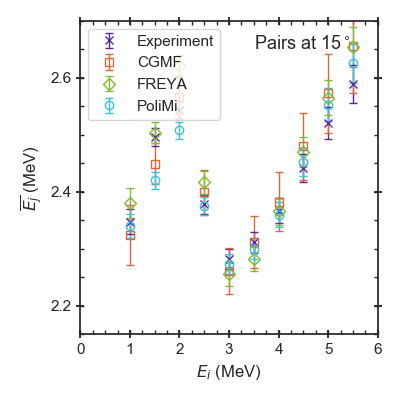

<IPython.core.display.Javascript object>


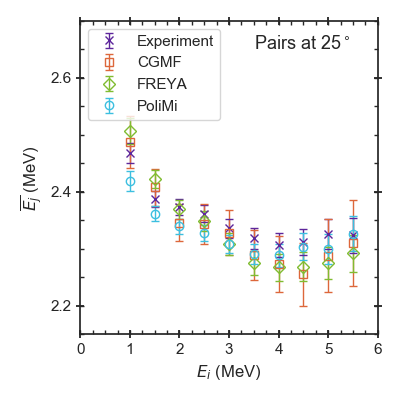

<IPython.core.display.Javascript object>


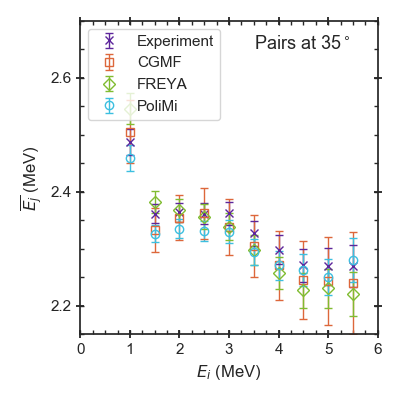

<IPython.core.display.Javascript object>


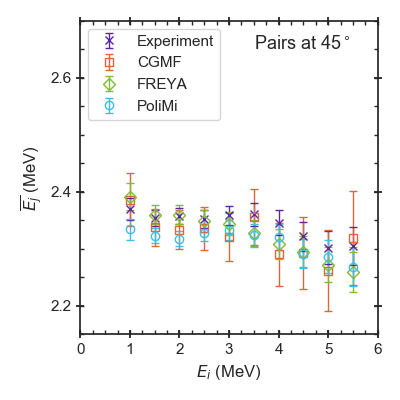

<IPython.core.display.Javascript object>


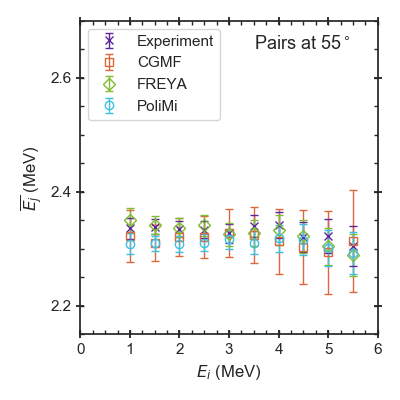

<IPython.core.display.Javascript object>


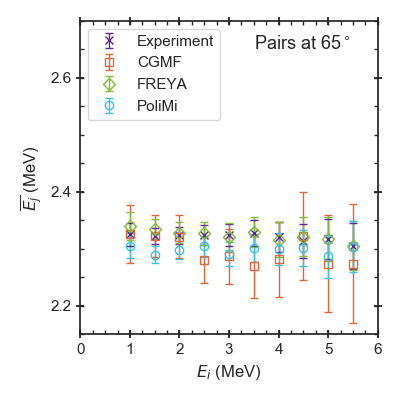

<IPython.core.display.Javascript object>


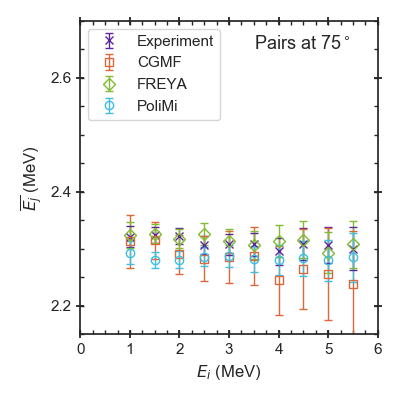

<IPython.core.display.Javascript object>


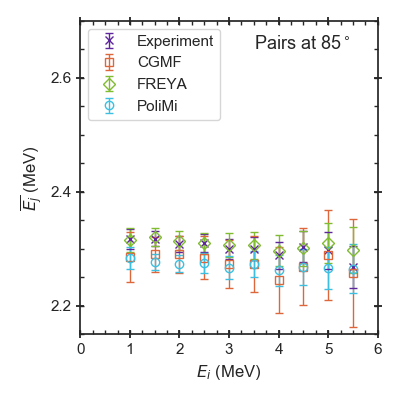

<IPython.core.display.Javascript object>


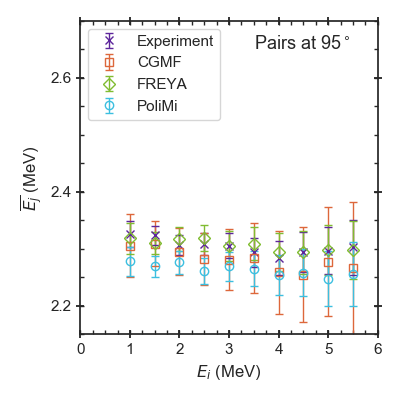

<IPython.core.display.Javascript object>


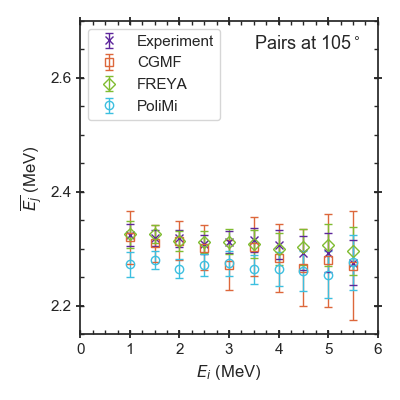

<IPython.core.display.Javascript object>


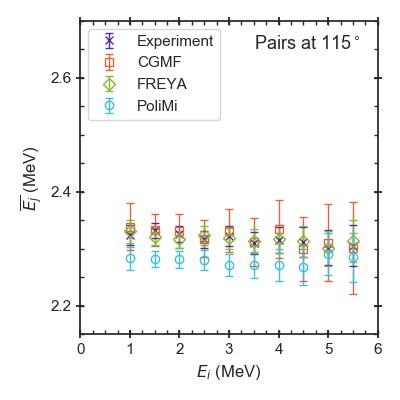

<IPython.core.display.Javascript object>


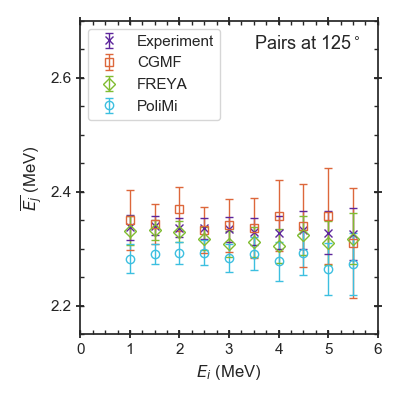

<IPython.core.display.Javascript object>


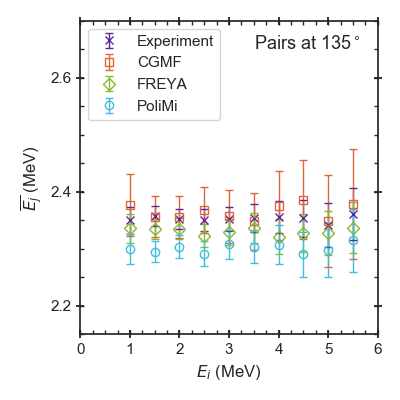

<IPython.core.display.Javascript object>


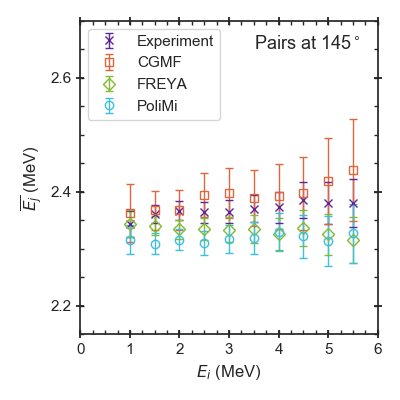

<IPython.core.display.Javascript object>


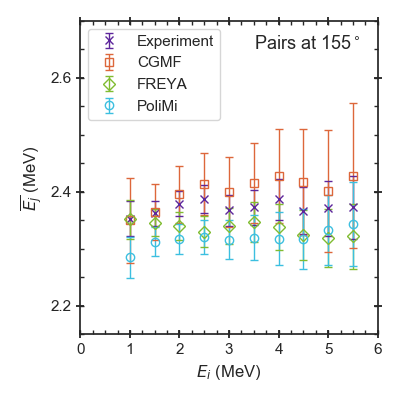

<IPython.core.display.Javascript object>


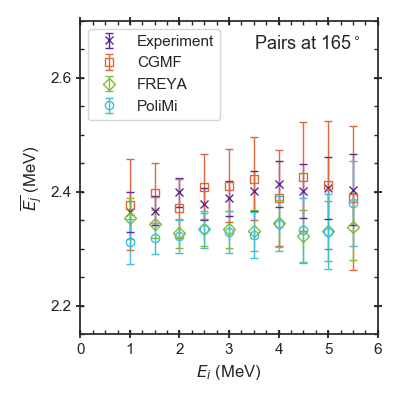

<IPython.core.display.Javascript object>


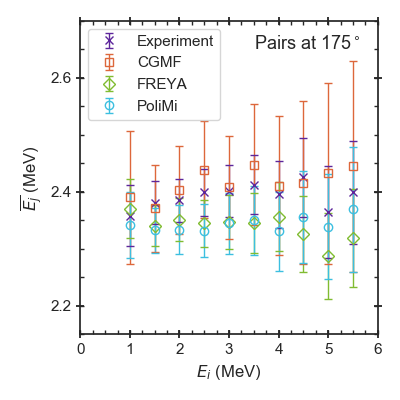

In [11]:
filenames_Eave = []
for a in angle_indices:
    fig = plt.figure(figsize=(4,4))
    ax = plt.gca()
    for i in to_plot:
        data = datasets[i]
        angle_mid = angle_bin_centers[a]
        angle_min = angle_bin_edges[a]
        angle_max = angle_bin_edges[a+1] 
        title = '{} to {} degrees'.format(angle_min, angle_max) 

        x = data['e_slices']
        y = data['Eave'][a,:]
        yerr = data['Eave_err'][a,:]

        ax.errorbar(x[1:],y[1:],yerr=yerr[1:],
                     fmt=fmts[i],
                     markeredgewidth=1,
                     markerfacecolor='none',
                     elinewidth = line_thickness,
                     capthick = line_thickness,
                     capsize=ebar_width,
                     c = colors[i])

    ax.set_xlabel('$E_i$ (MeV)')
    ax.set_ylabel('$\overline{E_j}$ (MeV)')

    ax.set_xlim([0,6])
    ax.set_ylim([2.15,2.7])

    ax.text(3.5,2.65,'Pairs at {}$^\circ$'.format(int(angle_mid)), size=13)  

    # Set up ticks
    ax.tick_params(axis='both',
                   which='major',
                   direction='inout',
                   length=6,
                   color='k',
                   bottom=True, right=True, top=True, left=True)
    ax.tick_params(axis='both',
                   which='minor',
                   direction='in',
                   length=3,
                   bottom=True, right=True, top=True, left=True)
    # Major
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    # Minor
    ax.xaxis.set_minor_locator(MultipleLocator(.25))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    
    plt.legend([legends[i] for i in to_plot], loc=2)   
    plt.tight_layout()
    filename_Eave = 'Eave_{}_degrees'.format(int(angle_mid)); filenames_Eave.append(filename_Eave);
    bicorr_plot.save_fig_to_folder(filename_Eave,r'compare\fig\animate')

Redo 85 and 175 degrees

In [12]:
filenames_Eave

['Eave_15_degrees',
 'Eave_25_degrees',
 'Eave_35_degrees',
 'Eave_45_degrees',
 'Eave_55_degrees',
 'Eave_65_degrees',
 'Eave_75_degrees',
 'Eave_85_degrees',
 'Eave_95_degrees',
 'Eave_105_degrees',
 'Eave_115_degrees',
 'Eave_125_degrees',
 'Eave_135_degrees',
 'Eave_145_degrees',
 'Eave_155_degrees',
 'Eave_165_degrees',
 'Eave_175_degrees']

In [13]:
import imageio

images_Eave = []
for filename in filenames_Eave:
    images_Eave.append(imageio.imread(os.path.join('compare/fig/animate/',filename + '.png')))
imageio.mimsave('compare/fig/animate_Eave.gif',images_Eave, fps=1)


# Make figures for just the angles I will put in the paper (changing yrange)

Fig. 10 (a), (b), and (c) in the paper.

In [14]:
angle_bin_centers[[7,12,16]]

array([ 85.01, 135.01, 175.01])

In [15]:
indices = [7,12,16];
letters = ['(a)','(b)','(c)']

In [16]:
for i in np.arange(3):
    print(letters[i])

(a)
(b)
(c)


<IPython.core.display.Javascript object>


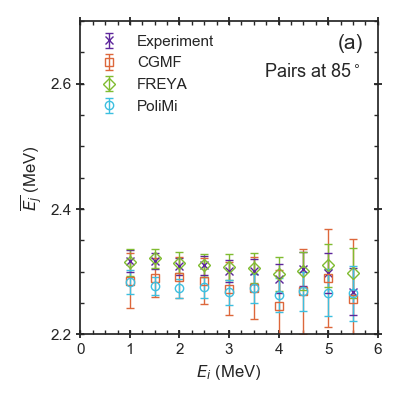

<IPython.core.display.Javascript object>


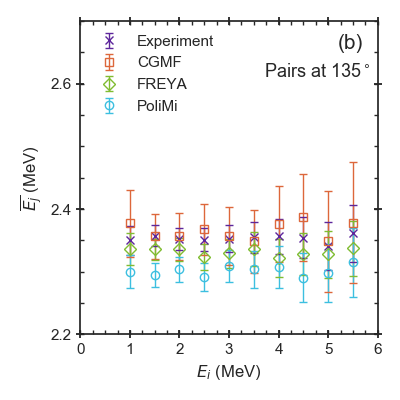

<IPython.core.display.Javascript object>


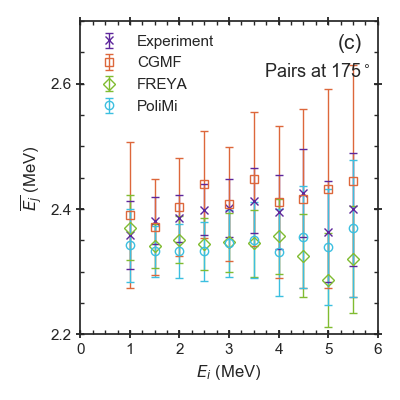

In [17]:
filenames_Eave = []
for j in np.arange(3):
    a = indices[j]
    fig = plt.figure(figsize=(4,4))
    ax = plt.gca()
    for i in to_plot:
        data = datasets[i]
        angle_mid = angle_bin_centers[a]
        angle_min = angle_bin_edges[a]
        angle_max = angle_bin_edges[a+1] 
        title = '{} to {} degrees'.format(angle_min, angle_max) 

        x = data['e_slices']
        y = data['Eave'][a,:]
        yerr = data['Eave_err'][a,:]

        ax.errorbar(x[1:],y[1:],yerr=yerr[1:],
                     fmt=fmts[i],
                     markeredgewidth=1,
                     markerfacecolor='none',
                     elinewidth = line_thickness,
                     capthick = line_thickness,
                     capsize=ebar_width,
                     c = colors[i])

    ax.set_xlabel('$E_i$ (MeV)')
    ax.set_ylabel('$\overline{E_j}$ (MeV)')

    ax.set_xlim([0,6])
    ax.set_ylim([2.2,2.7])

    ax.text(3.7,2.61,'Pairs at {}$^\circ$'.format(int(angle_mid)), size=13)  
    ax.text(5.2,2.655,letters[j], size=15, backgroundcolor='white')

    # Set up ticks
    ax.tick_params(axis='both',
                   which='major',
                   direction='inout',
                   length=6,
                   color='k',
                   bottom=True, right=True, top=True, left=True)
    ax.tick_params(axis='both',
                   which='minor',
                   direction='in',
                   length=3,
                   bottom=True, right=True, top=True, left=True)
    # Major
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    # Minor
    ax.xaxis.set_minor_locator(MultipleLocator(.25))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    
    leg = plt.legend([legends[i] for i in to_plot], loc=2)   
    leg.get_frame().set_edgecolor('w')
    plt.tight_layout()
    filename_Eave = 'Eave_{}_degrees1'.format(int(angle_mid)); filenames_Eave.append(filename_Eave);
    bicorr_plot.save_fig_to_folder(filename_Eave,r'compare\fig\animate')

# Animate as $E_j$ varies
For Figure 9 in the paper.

In [18]:
e_slices = ipol_data['e_slices']

In [19]:
cgmf_data['angle_bin_centers']

array([ 15.01,  25.01,  35.01,  45.01,  55.01,  65.01,  75.01,  85.01,
        95.01, 105.01, 115.01, 125.01, 135.01, 145.01, 155.01, 165.01,
       175.01])

In [20]:
e_slices[5]

3.0

In [21]:
letters = ['(a)','(a)','(a)','(a)','(b)','(b)']

C:\Users\pfsch\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


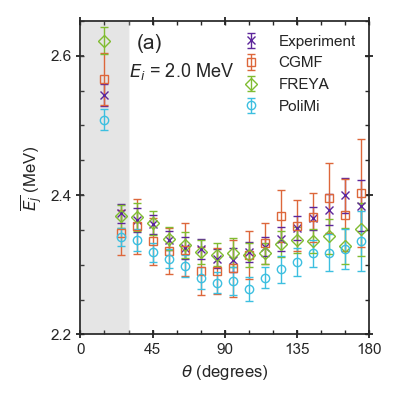

<IPython.core.display.Javascript object>


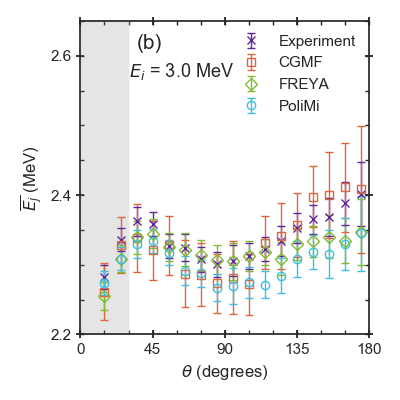

In [22]:
filenames_Ej = []
for e in [3,5]: # np.arange(1,len(e_slices)):
    fig = plt.figure(figsize=(4,4))
    ax = plt.gca()
    for i in to_plot:
        data = datasets[i]
        e_slice = e_slices[e]
        title = '$E_j$ = {} MeV'.format(e_slice) 

        x = data['angle_bin_centers']
        y = data['Eave'][:,e]
        yerr = data['Eave_err'][:,e]

        ax.errorbar(x,y,yerr=yerr,
                     fmt=fmts[i],
                     markeredgewidth=1,
                     markerfacecolor='none',
                     elinewidth = line_thickness,
                     capthick = line_thickness,
                     capsize=ebar_width,
                     c = colors[i])
        
    leg = plt.legend([legends[i] for i in to_plot], loc=1,framealpha=0)   
    leg.get_frame().set_edgecolor('w')
    ax.text(30,2.57,'$E_i$ = {0:.1f} MeV'.format(e_slice), size=13) 
    ax.text(35,2.61,letters[e], size=15, backgroundcolor='white')
    
    ax.set_xlabel(r'$\theta$ (degrees)')
    ax.set_ylabel('$\overline{E_j}$ (MeV)')       
    ax.set_xlim([0,180])  
    ax.set_ylim([2.2,2.65])
    
        # Set up ticks
    ax.tick_params(axis='both',
                   which='major',
                   direction='inout',
                   length=6,
                   color='k',
                   bottom=True, right=True, top=True, left=True)
    ax.tick_params(axis='both',
                   which='minor',
                   direction='in',
                   length=3,
                   bottom=True, right=True, top=True, left=True)
    # Major
    ax.xaxis.set_major_locator(MultipleLocator(45))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    # Minor
    ax.xaxis.set_minor_locator(MultipleLocator(15))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    
    plt.axvspan(0,30,facecolor='gray', alpha=0.2)
    plt.tight_layout()
        
    filename_Ej = 'Eave_at_{}_MeV'.format(e_slice).replace('.','_'); filenames_Ej.append(filename_Ej);
    bicorr_plot.save_fig_to_folder(filename_Ej,r'compare\fig\animate')

In [ ]:
filenames_Ej

In [23]:
import imageio

images_Ej = []
for filename in filenames_Ej:
    print(filename)
    images_Ej.append(imageio.imread(os.path.join('compare/fig/animate/',filename + '.png')))
imageio.mimsave('compare/fig/animate_Eave_vs_angle.gif',images_Ej, fps=1)


Eave_at_2_0_MeV
Eave_at_3_0_MeV


# Compare $\bar{E_j}$ vs. $\theta$ for different $E_i$

Plot on the same axis for one dataset

Load E_sum dat

In [23]:
Esum_df_meas = pd.read_csv(r'Cf072115_to_Cf072215b/datap/Esum_df.csv',index_col=0)
Esum_df_cgmf = pd.read_csv(r'cgmf/datap/Esum_df.csv',index_col=0)
Esum_df_freya= pd.read_csv(r'freya/datap/Esum_df.csv',index_col=0)
Esum_df_ipol = pd.read_csv(r'ipol/datap/Esum_df.csv',index_col=0)
Esum_df_ipol_noct = pd.read_csv(r'ipol_noct/datap/Esum_df.csv',index_col=0)
Esum_dfs = [Esum_df_meas, Esum_df_cgmf, Esum_df_freya, Esum_df_ipol, Esum_df_ipol_noct]

C:\Users\pfsch\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


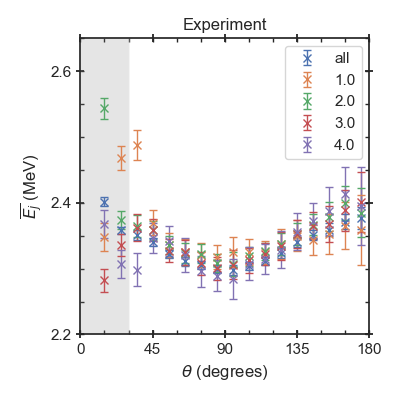

<IPython.core.display.Javascript object>


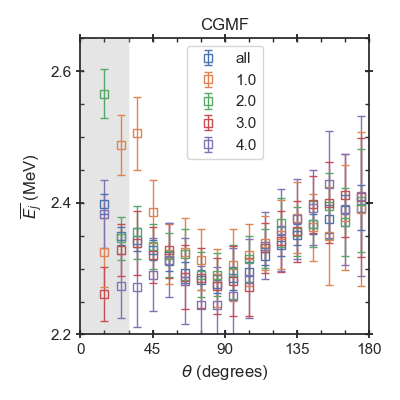

<IPython.core.display.Javascript object>


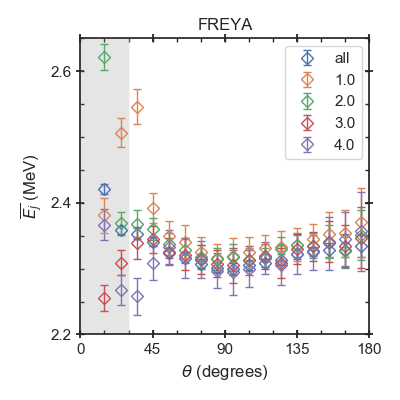

<IPython.core.display.Javascript object>


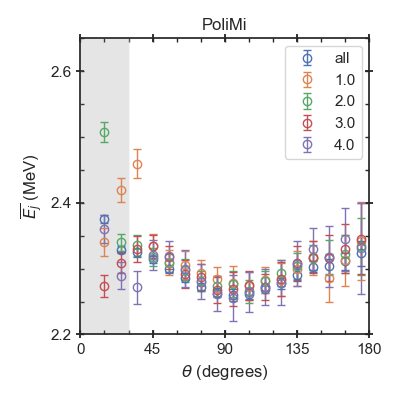

In [24]:
filenames_Ej = []
e_indices = [1,3,5,7]
for i in to_plot:
    Esum_df = Esum_dfs[i]
    
    data = datasets[i]
    fig = plt.figure(figsize=(4,4))
    ax = plt.gca()    
    title = legends[i]
    
    ax.errorbar(Esum_df['th_bin_center'],
                 Esum_df['Eave'],
                 yerr=Esum_df['Eave_err'],
                 fmt=fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='none',
                 elinewidth=line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width)    
    
    for e in e_indices:
        e_slice = e_slices[e]
        x = data['angle_bin_centers']
        y = data['Eave'][:,e]
        yerr = data['Eave_err'][:,e]
        
        ax.errorbar(x,y,yerr=yerr,
                    fmt = fmts[i],
                    markeredgewidth=1,
                    markerfacecolor='none',
                    elinewidth=line_thickness,
                    capthick=line_thickness,
                    capsize=ebar_width)
    plt.legend(['all']+[str(e_slices[i]) for i in e_indices])
    plt.title(title)
    
    ax.set_xlabel(r'$\theta$ (degrees)')
    ax.set_ylabel('$\overline{E_j}$ (MeV)')       
    ax.set_xlim([0,180])  
    ax.set_ylim([2.2,2.65])
    
    # Set up ticks
    ax.tick_params(axis='both',
                   which='major',
                   direction='inout',
                   length=6,
                   color='k',
                   bottom=True, right=True, top=True, left=True)
    ax.tick_params(axis='both',
                   which='minor',
                   direction='in',
                   length=3,
                   bottom=True, right=True, top=True, left=True)
    # Major
    ax.xaxis.set_major_locator(MultipleLocator(45))
    ax.yaxis.set_major_locator(MultipleLocator(0.2))
    # Minor
    ax.xaxis.set_minor_locator(MultipleLocator(15))
    ax.yaxis.set_minor_locator(MultipleLocator(0.05))
    
    plt.axvspan(0,30,facecolor='gray', alpha=0.2)
    plt.tight_layout()
    
    bicorr_plot.save_fig_to_folder('Ejave_vs_theta_'+title,r'compare\fig')

# Correlation analysis

Figure 10(d).

Calculate the slope of Ejave vs. Ei distributions. 

C:\Users\pfsch\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


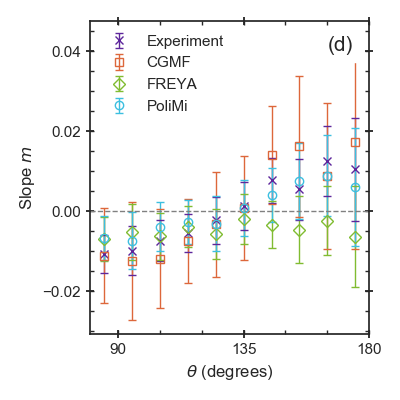

-0.01066290998387693 0.004765278647968784
-0.011046563623311655 0.011851044509140696
-0.006913728929896541 0.0055342930455116925
-0.00669193962855344 0.005484693994018513
-0.009869193514006502 0.006100039130334053
-0.012440560217735647 0.01473730974282733
-0.005221116835035788 0.006970937703973375
-0.007290539664322606 0.007103830095551016
-0.0073561255969496475 0.005114881250548707
-0.011797622617315795 0.012304665351978114
-0.006229550217329816 0.005823330016920515
-0.0038635346253614866 0.006106743442172745
-0.005406225188474334 0.004644668877244541
-0.007392242013785966 0.010501501393073182
-0.0038045863188116424 0.005040098603607989
-0.002748258906267597 0.005476485943804241
-0.002211271796041192 0.005873827343439876
-0.0032297103197314048 0.0131345366831293
-0.005547397263779175 0.0062549028787639935
-0.0030972392400754334 0.006925517282755157
0.0013387457047676632 0.005939681304633747
0.0009320209858943995 0.013014163738561672
-0.0018314690746867868 0.006252655884214518
0.000788

In [35]:
filenames_Eave = []
fig = plt.figure(figsize=(4,4))
ax = plt.gca()
angle_indices = np.arange(7,17)

for a in angle_indices:
    angle_mid = angle_bin_centers[a]
    angle_min = angle_bin_edges[a]
    angle_max = angle_bin_edges[a+1] 
    
    for i in to_plot:
        data = datasets[i]

        title = '{} to {} degrees'.format(angle_min, angle_max) 

        x = data['e_slices']
        y = data['Eave'][a,:]
        yerr = data['Eave_err'][a,:]
        
        m, m_err = bicorr_math.fit_f_line(x, y, y_err=yerr)[0:2]
        print(m, m_err)

        ax.errorbar(angle_mid,m,yerr=m_err,
                     fmt=fmts[i],
                     markeredgewidth=1,
                     markerfacecolor='none',
                     elinewidth = line_thickness,
                     capthick = line_thickness,
                     capsize=ebar_width,
                     c = colors[i])
        

leg = plt.legend([legends[i] for i in to_plot], loc=2)
leg.get_frame().set_edgecolor('w')
plt.axhline(0,color='gray', linewidth=1,linestyle='--')

ax.set_xlabel(r'$\theta$ (degrees)')
ax.set_ylabel(r'Slope $m$')

ax.set_xlim([80,180])

# Set up ticks
ax.tick_params(axis='both',
               which='major',
               direction='inout',
               length=6,
               color='k',
               bottom=True, right=True, top=True, left=True)
ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=3,
               bottom=True, right=True, top=True, left=True)

# Major
ax.xaxis.set_major_locator(MultipleLocator(45))
ax.yaxis.set_major_locator(MultipleLocator(0.02))
# Minor
ax.xaxis.set_minor_locator(MultipleLocator(15))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))
  
ax.text(165,0.04,'(d)', size=15, backgroundcolor='white')
    
plt.tight_layout()
bicorr_plot.save_fig_to_folder(r'e_slices_slope',r'compare\fig')